In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import pandas_datareader.data as web 
import seaborn as sns
import yfinance as yf

In [3]:
# Return the stock tag of companies for a category
def read_txt(name, verbose=False):
    x=[]
    with open('txt/' +name + '.txt', 'r') as fp:
        for line in fp:
            x.append(line[:-1])
    if verbose:
        print('Done')
    return x

# Write a stock name in the appropriate list
# tag_list => ['IBM', 'GOOGL']
# name => tech
def write_stock_txt(tag_list, name, verbose = False):
    try:
        x = read_txt(name)
    except:
        x = []

    with open('txt/' + name+'.txt', 'a') as fp:
        for item in tag_list:
            if item in x:
                print(f"{item} is already in the category {name} and won't be added again")
            else:
                try:
                    web.DataReader(item, 'yahoo')
                except:
                    print(f"{item} does not seem to be a stock action")
                    continue
                # write each item on a new line
                fp.write("%s\n" % item)
    if verbose:
        print('Done')

# Write an idx name in the appropriate list
# tag_list => ['SP500', 'DJIA', 'VIXCLS']
# name => idx or ccy
def write_idx_txt(tag_list, name, verbose = False):
    try:
        x = read_txt(name)
    except:
        x = []

    with open('txt/' + name+'.txt', 'a') as fp:
        for item in tag_list:
            if item in x:
                print(f"{item} is already in the category {name} and won't be added again")
            else:
                try:
                    web.DataReader(item, 'fred')
                except:
                    print(f"{item} does not seem to be a stock action")
                    continue
                # write each item on a new line
                fp.write("%s\n" % item)
    if verbose:
        print('Done')

In [4]:
#stk_tickers = ['TSM', 'NVDA', 'META', 'AMZN', 'TSLA', 'PYPL', 'EA', 'IBM', 'INTC']
#write_stock_txt(stk_tickers, 'tech')


In [15]:
x= read_txt('tech')
x

['MSFT', 'IBM', 'GOOGL', 'AAPL', 'TSM', 'NVDA', 'META', 'AMZN', 'TSLA']

In [34]:
stk_data = yf.download('IBM', start = '1999-01-01')
stk_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,88.432121,89.149139,86.759079,87.476097,50.287624,8524482
1999-01-05,87.476097,90.762428,87.386475,90.642921,52.108154,10363350
1999-01-06,90.971558,92.136711,90.105164,90.224663,51.867714,9978422
1999-01-07,89.836281,91.957458,89.388145,90.911804,52.262726,8688913
1999-01-08,91.300194,91.778206,88.730881,89.657028,51.541401,9598933
...,...,...,...,...,...,...
2022-12-23,140.589996,141.860001,139.600006,141.649994,141.649994,2092500
2022-12-27,141.729996,142.720001,141.229996,142.419998,142.419998,2742400
2022-12-28,142.399994,142.809998,139.949997,140.020004,140.020004,2539500


In [28]:
conversion = 'DEXUSEU'
conversion

'DEXUSEU'

In [32]:
ccy_data = web.DataReader(conversion, 'fred', start='1999')
ccy_data

,DEXUSEU
DATE,
1999-01-04,1.1812
1999-01-05,1.1760
1999-01-06,1.1636
1999-01-07,1.1672
1999-01-08,1.1554
...,...
2022-12-19,1.0624
2022-12-20,1.0635
2022-12-21,1.0599


In [35]:
test = pd.concat([stk_data, ccy_data], axis=1)
test

,Open,High,Low,Close,Adj Close,Volume,DEXUSEU
1999-01-04,88.432121,89.149139,86.759079,87.476097,50.287624,8524482.0,1.1812
1999-01-05,87.476097,90.762428,87.386475,90.642921,52.108154,10363350.0,1.1760
1999-01-06,90.971558,92.136711,90.105164,90.224663,51.867714,9978422.0,1.1636
1999-01-07,89.836281,91.957458,89.388145,90.911804,52.262726,8688913.0,1.1672
1999-01-08,91.300194,91.778206,88.730881,89.657028,51.541401,9598933.0,1.1554
...,...,...,...,...,...,...,...
2022-12-23,140.589996,141.860001,139.600006,141.649994,141.649994,2092500.0,1.0621
2022-12-27,141.729996,142.720001,141.229996,142.419998,142.419998,2742400.0,NaN
2022-12-28,142.399994,142.809998,139.949997,140.020004,140.020004,2539500.0,NaN
2022-12-29,140.580002,142.259995,140.449997,141.059998,141.059998,2337200.0,NaN


In [36]:
# Voir si on a un NAN entre deux valeurs 
# Voir pour la currency => Changer avec yahoo finance
# Normaliser => Plus besoin avec les returns
#Faire les returns => ok avec pct change + *100
stk_data.pct_change()*100

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,-1.081082,1.809652,0.723147,3.620217,3.620235,21.571610
1999-01-06,3.995904,1.514154,3.111110,-0.461436,-0.461426,-3.714320
1999-01-07,-1.247947,-0.194551,-0.795757,0.761589,0.761576,-12.922975
1999-01-08,1.629534,-0.194930,-0.735293,-1.380212,-1.380190,10.473347
...,...,...,...,...,...,...
2022-12-23,-0.255410,0.296944,0.706977,0.546557,0.546557,-37.295856
2022-12-27,0.810868,0.606232,1.167614,0.543596,0.543596,31.058542
2022-12-28,0.472729,0.063058,-0.906322,-1.685152,-1.685152,-7.398629


In [94]:
stk_data['Close'][stk_data.index>'2020']

Symbols,MSFT,IBM,GOOGL,AAPL,TSM,NVDA,META,BABA,AMZN,TSLA,PYPL,EA,INTC
Date,,,,,,,,,,,,,
2020-01-02,160.619995,129.464630,68.433998,75.087502,60.040001,59.977501,209.779999,219.770004,94.900497,28.684000,110.750000,107.339996,60.840000
2020-01-03,158.619995,128.432129,68.075996,74.357498,58.060001,59.017502,208.669998,217.000000,93.748497,29.534000,108.760002,107.199997,60.099998
2020-01-06,159.029999,128.202682,69.890503,74.949997,57.389999,59.264999,212.600006,216.639999,95.143997,30.102667,110.169998,108.779999,59.930000
2020-01-07,157.580002,128.288712,69.755501,74.597504,58.320000,59.982498,213.059998,217.630005,95.343002,31.270666,109.669998,108.389999,58.930000
2020-01-08,160.089996,129.359467,70.251999,75.797501,58.750000,60.095001,215.220001,218.000000,94.598503,32.809334,111.820000,109.489998,58.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,254.690002,149.160004,100.989998,148.309998,82.680000,171.350006,120.440002,85.940002,95.500000,194.699997,78.529999,131.619995,29.830000
2022-12-02,255.020004,148.669998,100.440002,147.809998,81.500000,168.759995,123.489998,90.059998,94.129997,194.860001,74.660004,132.279999,29.410000
2022-12-05,250.199997,147.410004,99.480003,146.630005,81.620003,166.100006,122.430000,90.519997,91.010002,182.449997,73.620003,130.419998,29.170000


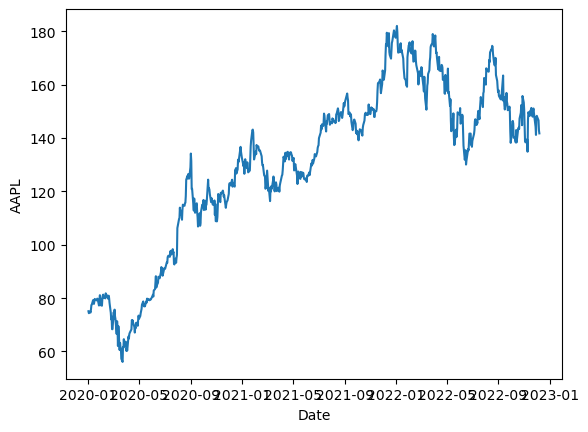

In [119]:
def plot_line(df, stk_type, stk_name, beg=2000, end=2023, xlabel=False):
    sns.lineplot(data=df[stk_type].loc[str(beg):str(end):,stk_name])
    if xlabel:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
        plt.show

plot_line(stk_data, 'Close', 'AAPL',beg=2020)